## 1. Prepare data and architecture

In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
# Load your dataset
column_names = ['name_of_surface_type', 'name_of_active_site_type']
for i in range(1,61):
    column_names.append('element_of_atom_'+str(i))
    column_names.append('CN_of_atom_'+str(i))
column_names.append('adsorption_energy')
df = pd.read_csv('journal_data/data.csv', names=column_names, header=None)

In [3]:
df_dummies = pd.get_dummies(df, columns=["name_of_surface_type", "name_of_active_site_type"]).astype(int)
# df drop first column
df = df.drop(df.columns[0], axis=1)
df = df.drop(df.columns[0], axis=1)
df = pd.concat([df_dummies, df], axis=1)
df

,element_of_atom_1,CN_of_atom_1,element_of_atom_2,CN_of_atom_2,element_of_atom_3,CN_of_atom_3,element_of_atom_4,CN_of_atom_4,element_of_atom_5,CN_of_atom_5,...,CN_of_atom_56,element_of_atom_57,CN_of_atom_57,element_of_atom_58,CN_of_atom_58,element_of_atom_59,CN_of_atom_59,element_of_atom_60,CN_of_atom_60,adsorption_energy
0,0,1,0,8,1,0,0,0,6,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.521873
1,0,0,0,8,1,0,1,0,6,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.471441
2,0,2,3,8,1,0,1,0,6,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.993456
3,0,2,3,8,1,0,1,0,6,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.905204
4,0,0,0,8,1,0,0,0,6,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.757654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,0,1,0,7,1,0,1,0,7,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.376493
1366,0,0,0,7,1,0,1,0,7,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.590500
1367,0,1,0,7,1,0,0,0,7,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.560202
1368,0,0,0,7,1,0,1,0,7,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.637736


In [4]:
# Assuming the last column is the target and the rest are features
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Preprocessing: Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=40)

# Converting to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [5]:
# Creating a dataset and dataloader for batch processing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=True)

## 2. Neuron Network Architecture

### 2.1 NeuralNet1

In [6]:
# Neural Network Model
class NeuralNet(nn.Module):
    def __init__(self, input_size):
        super(NeuralNet, self).__init__()
        self.name = "NeuralNet1"
        self.fc1 = nn.Linear(input_size, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

### 2.2 NeuralNet2

In [7]:
# Neural Network Model
class NeuralNet2(nn.Module):
    def __init__(self, input_size):
        super(NeuralNet2, self).__init__()
        self.name = "NeuralNet2"
        self.fc1 = nn.Linear(input_size, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        return x

### 2.3 NeuralNet3

In [8]:
# Neural Network Model
class NeuralNet3(nn.Module):
    def __init__(self, input_size):
        super(NeuralNet3, self).__init__()
        self.name = "NeuralNet3"
        self.fc1 = nn.Linear(input_size, 128)
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        x = self.fc3(x)
        return x

### 2.4 NeuralNet4

In [9]:
# Neural Network Model
class NeuralNet4(nn.Module):
    def __init__(self, input_size):
        super(NeuralNet4, self).__init__()
        self.name = "NeuralNet4"
        self.fc1 = nn.Linear(input_size, 128)
        self.sigmoid = nn.Sigmoid()  # Change the activation function to sigmoid
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.sigmoid(x)  # Apply sigmoid activation function
        x = self.fc2(x)
        x = self.sigmoid(x)  # Apply sigmoid activation function
        x = self.fc3(x)
        x = self.sigmoid(x)  # Apply sigmoid activation function
        x = self.fc4(x)
        return x

## 3. Training Function

In [10]:
def train_model(model, train_loader, test_loader, num_epochs, lr=0.001):
    criterion = nn.L1Loss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    model.train()  # Set the model to training mode
    loss_history = []
    accuracy_history = []

    for epoch in range(num_epochs):
        total_loss = 0

        # Training phase
        for inputs, labels in train_loader:
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels.unsqueeze(1))

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        average_loss = total_loss / len(train_loader)
        loss_history.append(average_loss)

    # Evaluate the model on the testing set
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        predict_Y = model(X_test_tensor).squeeze().numpy()

    # Plot the predicted target vs true target
    plt.scatter(y_test, predict_Y)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
    plt.xlabel('True Target')
    plt.ylabel('Predicted Target')
    plt.title('Predicted Target vs True Target_'+model.name+'_lr='+str(lr))
    plt.text(min(y_test), max(y_test), f'R2 Score: {r2_score(y_test, predict_Y):.4f}', ha='left', va='bottom')
    plt.show()
    
        
    #print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {average_loss:.4f}, Accuracy: {accuracy:.2f}%')


    return model, average_loss, r2_score(y_test, predict_Y), loss_history, loss_history[-1]

## 4. Model Testing

In [11]:
input_size = X_train_tensor.shape[1]
model_performance = pd.DataFrame(columns=['Model', 'Loss', 'R2 Score', 'learning_rate', 'loss(MAE)'])

### 4.1 NeuralNet1

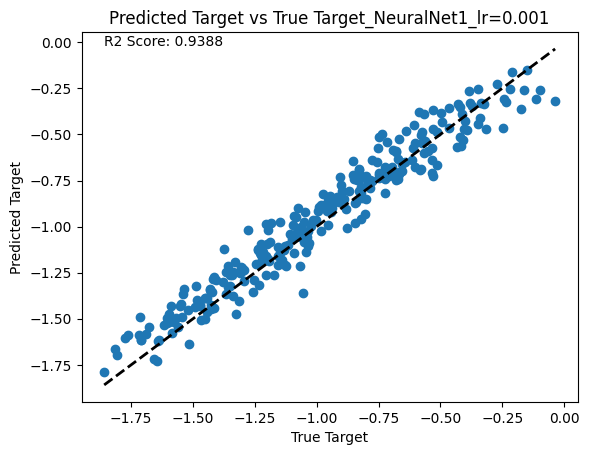

C:\Users\hdape\AppData\Local\Temp\ipykernel_20072\2653586431.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_performance = pd.concat([model_performance, pd.DataFrame([new_row])])


Text(0, 0.5, 'Loss')

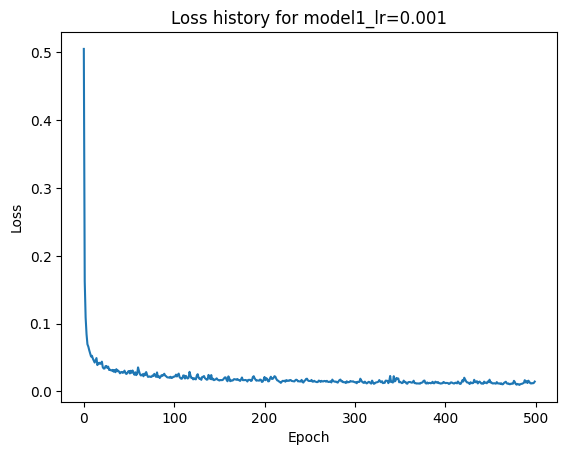

In [12]:
# Instantiate the model
model = NeuralNet(input_size)
model, model1_loss, model1_r2, loss_history1, last_loss1 = train_model(model, train_loader, test_loader, num_epochs=500, lr=0.001)

# Append a new row to model_performance dataframe
new_row = {'Model': model.name, 'Loss': model1_loss, 'R2 Score': model1_r2, 'learning_rate': 0.001, 'loss(MAE)': last_loss1}
model_performance = pd.concat([model_performance, pd.DataFrame([new_row])])

# plot the loss history
plt.plot(loss_history1)
plt.title('Loss history for model1_lr=0.001')
plt.xlabel('Epoch')
plt.ylabel('Loss')

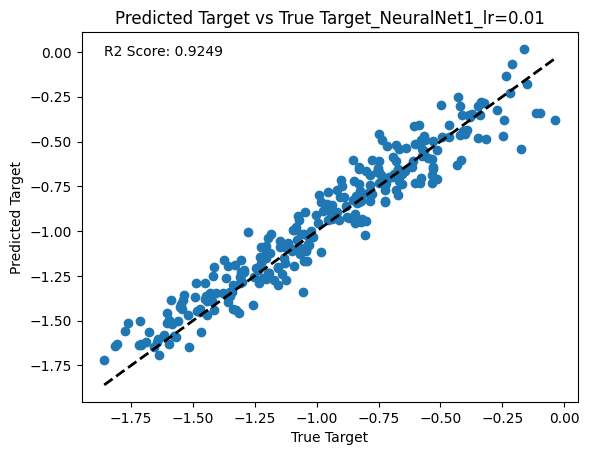

Text(0, 0.5, 'Loss')

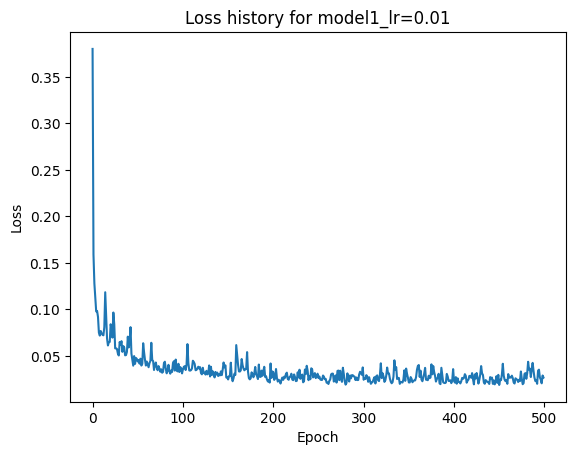

In [13]:
# Instantiate the model
model = NeuralNet(input_size)
model, model1_loss, model1_r2, loss_history1, last_loss1 = train_model(model, train_loader, test_loader, num_epochs=500, lr=0.01)

# Append a new row to model_performance dataframe
new_row = {'Model': model.name, 'Loss': model1_loss, 'R2 Score': model1_r2, 'learning_rate': 0.01, 'loss(MAE)': last_loss1}
model_performance = pd.concat([model_performance, pd.DataFrame([new_row])])

# plot the loss history
plt.plot(loss_history1)
plt.title('Loss history for model1_lr=0.01')
plt.xlabel('Epoch')
plt.ylabel('Loss')

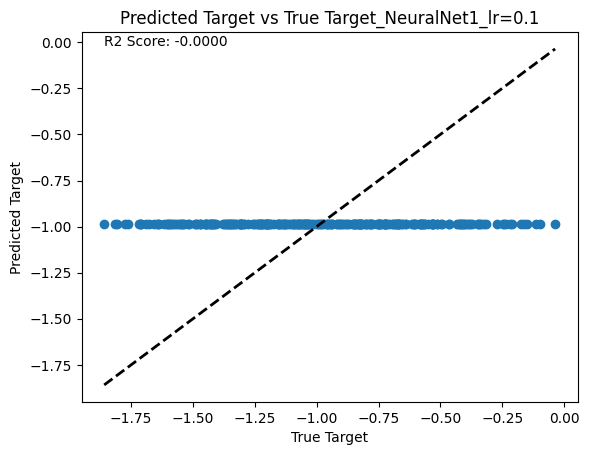

Text(0, 0.5, 'Loss')

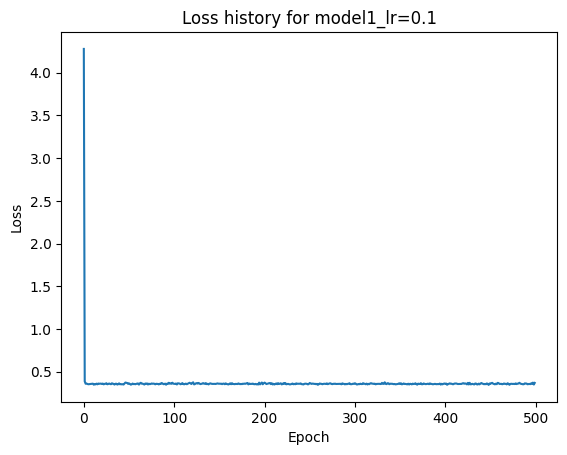

In [14]:
# Instantiate the model
model = NeuralNet(input_size)
model, model1_loss, model1_r2, loss_history1, last_loss1 = train_model(model, train_loader, test_loader, num_epochs=500, lr=0.1)

# Append a new row to model_performance dataframe
new_row = {'Model': model.name, 'Loss': model1_loss, 'R2 Score': model1_r2, 'learning_rate': 0.1, 'loss(MAE)': last_loss1}
model_performance = pd.concat([model_performance, pd.DataFrame([new_row])])

# plot the loss history
plt.plot(loss_history1)
plt.title('Loss history for model1_lr=0.1')
plt.xlabel('Epoch')
plt.ylabel('Loss')

### 4.2 NeuralNet2

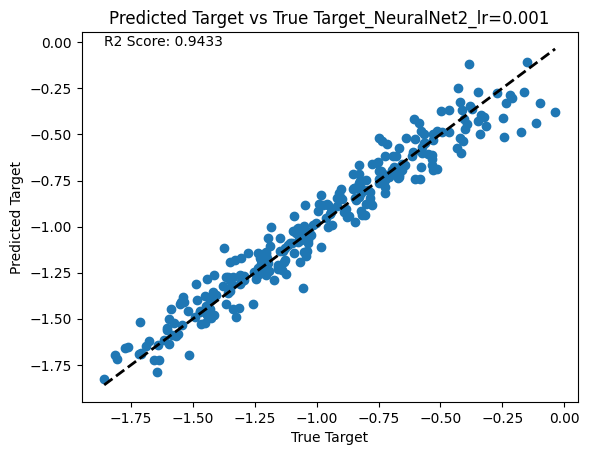

Text(0, 0.5, 'Loss')

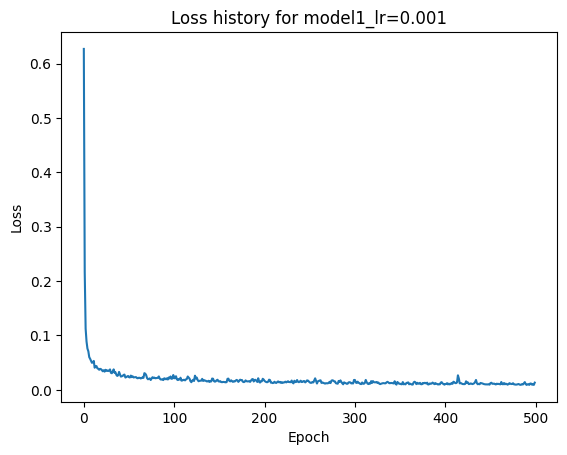

In [15]:
# Instantiate the model
model2 = NeuralNet2(input_size)
model2, model2_loss, model2_r2, loss_history2, last_loss2 = train_model(model2, train_loader, test_loader, num_epochs=500, lr=0.001)

# Append a new row to model_performance dataframe
new_row = {'Model': model2.name, 'Loss': model2_loss, 'R2 Score': model2_r2, 'learning_rate': 0.001, 'loss(MAE)': last_loss2}
model_performance = pd.concat([model_performance, pd.DataFrame([new_row])])

# plot the loss history
plt.plot(loss_history2)
plt.title('Loss history for model1_lr=0.001')
plt.xlabel('Epoch')
plt.ylabel('Loss')

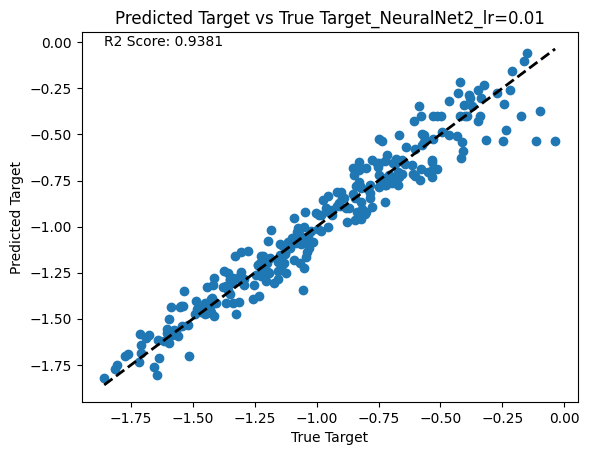

Text(0, 0.5, 'Loss')

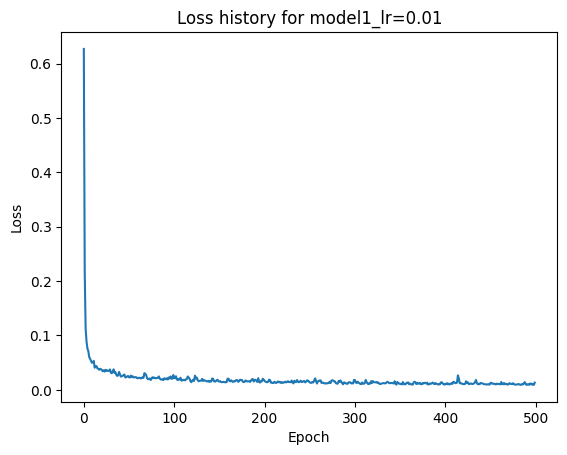

In [16]:
# Instantiate the model
model2 = NeuralNet2(input_size)
model2, model2_loss, model2_r2, loss_history21, last_loss2 = train_model(model2, train_loader, test_loader, num_epochs=500, lr=0.01)

# Append a new row to model_performance dataframe
new_row = {'Model': model2.name, 'Loss': model2_loss, 'R2 Score': model2_r2, 'learning_rate': 0.01, 'loss(MAE)': last_loss2}
model_performance = pd.concat([model_performance, pd.DataFrame([new_row])])

# plot the loss history
plt.plot(loss_history2)
plt.title('Loss history for model1_lr=0.01')
plt.xlabel('Epoch')
plt.ylabel('Loss')

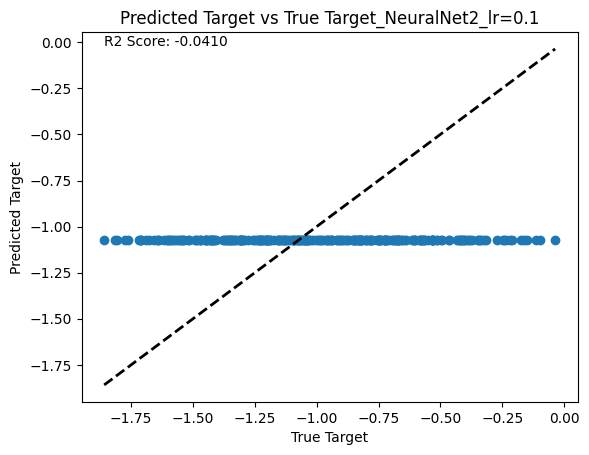

Text(0, 0.5, 'Loss')

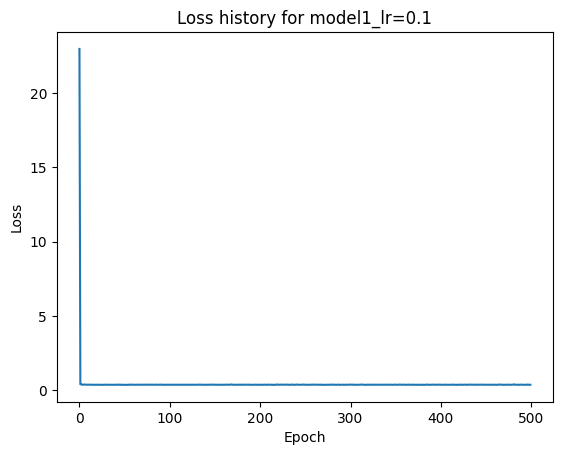

In [17]:
# Instantiate the model
model2 = NeuralNet2(input_size)
model2, model2_loss, model2_r2, loss_history2, last_loss2 = train_model(model2, train_loader, test_loader, num_epochs=500, lr=0.1)

# Append a new row to model_performance dataframe
new_row = {'Model': model2.name, 'Loss': model2_loss, 'R2 Score': model2_r2, 'learning_rate': 0.1, 'loss(MAE)': last_loss2}
model_performance = pd.concat([model_performance, pd.DataFrame([new_row])])

# plot the loss history
plt.plot(loss_history2)
plt.title('Loss history for model1_lr=0.1')
plt.xlabel('Epoch')
plt.ylabel('Loss')

### 4.3 NeuralNet3

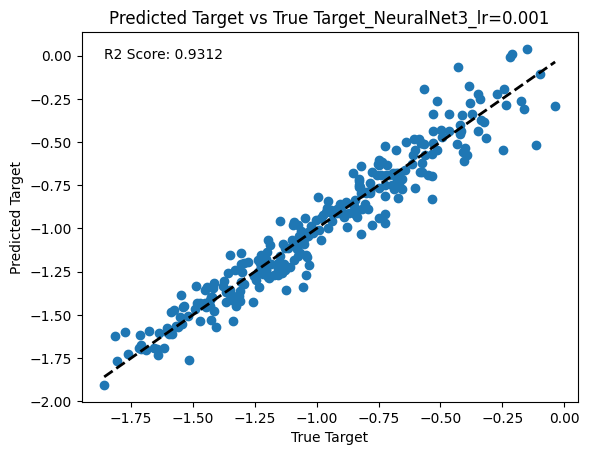

Text(0, 0.5, 'Loss')

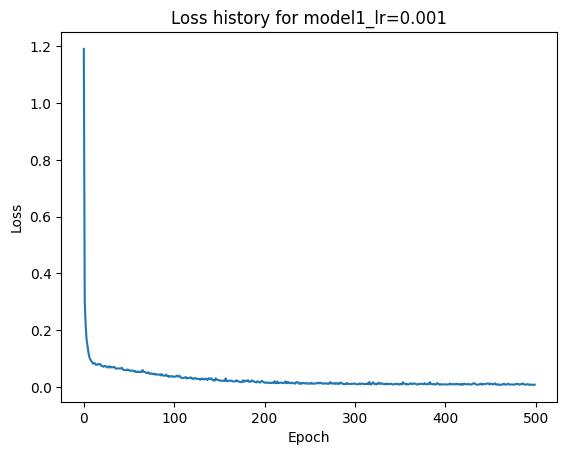

In [18]:
# Instantiate the model
model3 = NeuralNet3(input_size)
model3, model3_loss, model3_r2, loss_history3, last_loss3 = train_model(model3, train_loader, test_loader, num_epochs=500, lr=0.001)

# Append a new row to model_performance dataframe
new_row = {'Model': model3.name, 'Loss': model3_loss, 'R2 Score': model3_r2, 'learning_rate': 0.001, 'loss(MAE)': last_loss3}
model_performance = pd.concat([model_performance, pd.DataFrame([new_row])])

# plot the loss history
plt.plot(loss_history3)
plt.title('Loss history for model1_lr=0.001')
plt.xlabel('Epoch')
plt.ylabel('Loss')

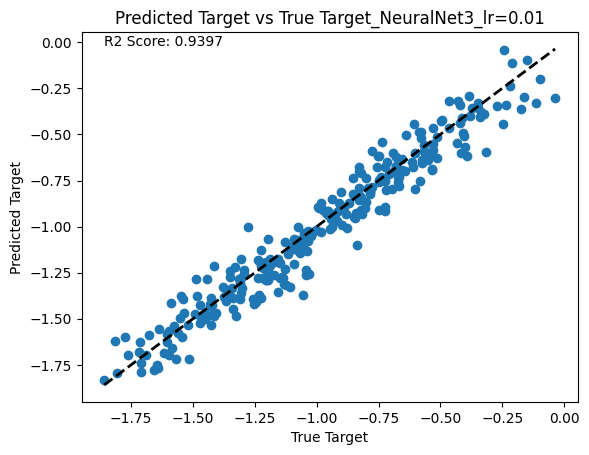

Text(0, 0.5, 'Loss')

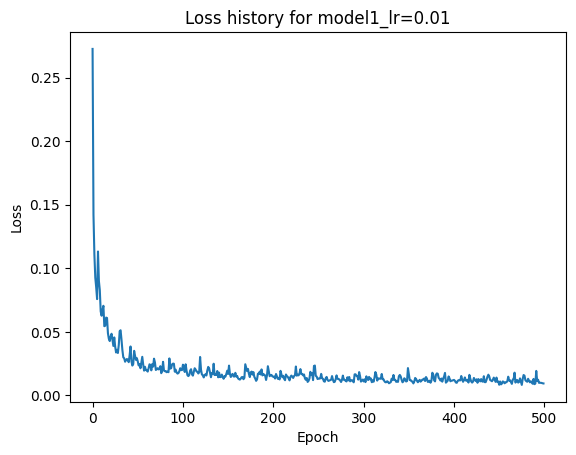

In [19]:
# Instantiate the model
model3 = NeuralNet3(input_size)
model3, model3_loss, model3_r2, loss_history3, last_loss3 = train_model(model3, train_loader, test_loader, num_epochs=500, lr=0.01)

# Append a new row to model_performance dataframe
new_row = {'Model': model3.name, 'Loss': model3_loss, 'R2 Score': model3_r2, 'learning_rate': 0.01, 'loss(MAE)': last_loss3}
model_performance = pd.concat([model_performance, pd.DataFrame([new_row])])

# plot the loss history
plt.plot(loss_history3)
plt.title('Loss history for model1_lr=0.01')
plt.xlabel('Epoch')
plt.ylabel('Loss')

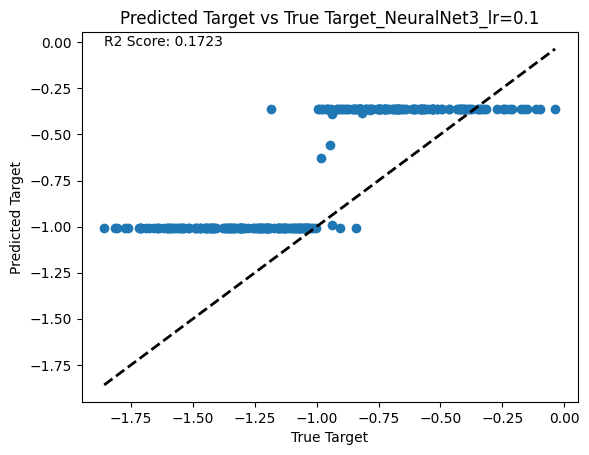

Text(0, 0.5, 'Loss')

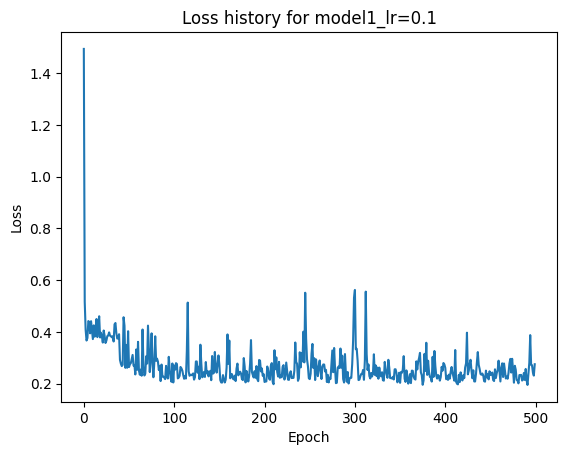

In [20]:
# Instantiate the model
model3 = NeuralNet3(input_size)
model3, model3_loss, model3_r2, loss_history3, last_loss3 = train_model(model3, train_loader, test_loader, num_epochs=500, lr=0.1)

# Append a new row to model_performance dataframe
new_row = {'Model': model3.name, 'Loss': model3_loss, 'R2 Score': model3_r2, 'learning_rate': 0.1, 'loss(MAE)': last_loss3}
model_performance = pd.concat([model_performance, pd.DataFrame([new_row])])

# plot the loss history
plt.plot(loss_history3)
plt.title('Loss history for model1_lr=0.1')
plt.xlabel('Epoch')
plt.ylabel('Loss')

### 4.4 NeuralNet4

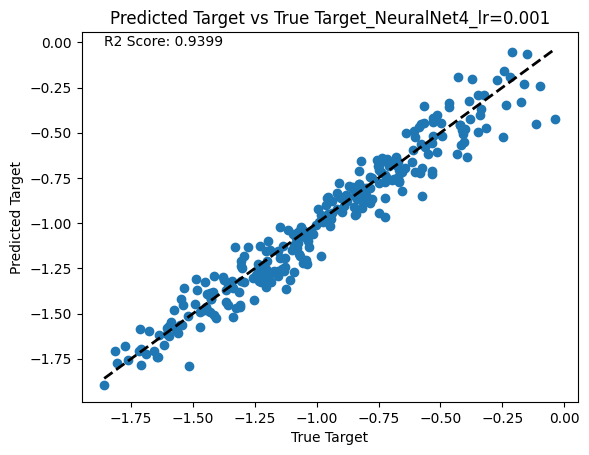

Text(0, 0.5, 'Loss')

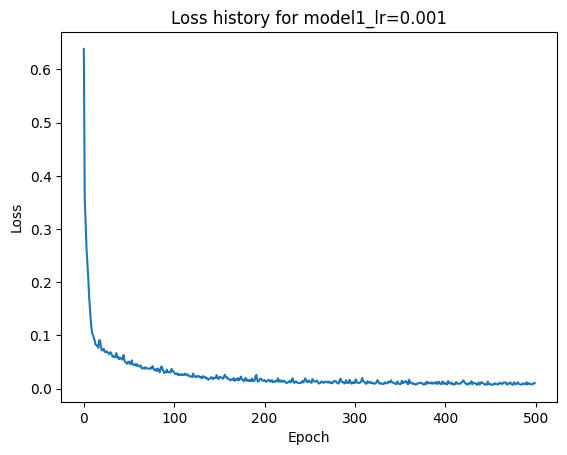

In [21]:
# Instantiate the model
model4 = NeuralNet4(input_size)
model4, model4_loss, model4_r2, loss_history4, last_loss4 = train_model(model4, train_loader, test_loader, num_epochs=500, lr=0.001)

# Append a new row to model_performance dataframe
new_row = {'Model': model4.name, 'Loss': model4_loss, 'R2 Score': model4_r2, 'learning_rate': 0.001, 'loss(MAE)': last_loss4}
model_performance = pd.concat([model_performance, pd.DataFrame([new_row])])

# plot the loss history
plt.plot(loss_history4)
plt.title('Loss history for model1_lr=0.001')
plt.xlabel('Epoch')
plt.ylabel('Loss')

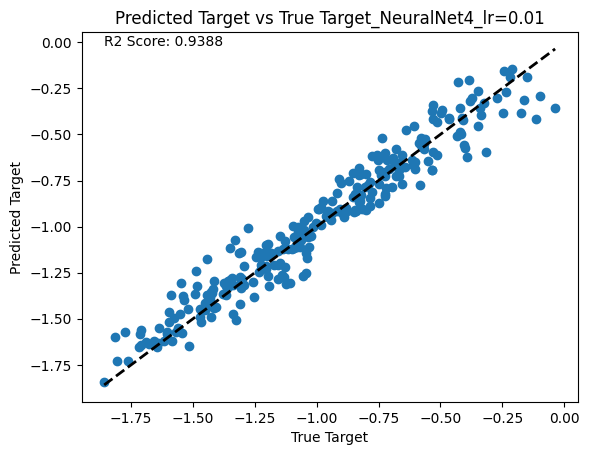

Text(0, 0.5, 'Loss')

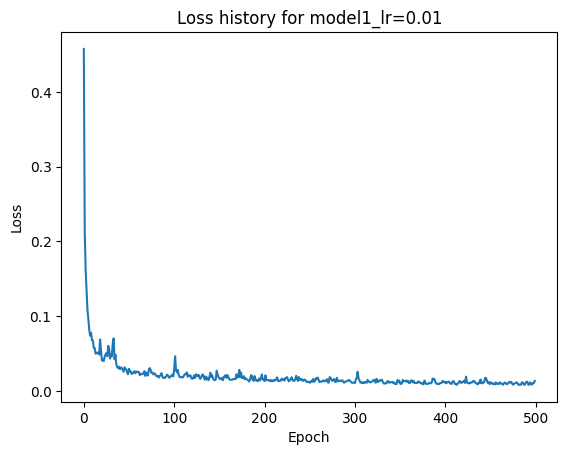

In [22]:
# Instantiate the model
model4 = NeuralNet4(input_size)
model4, model4_loss, model4_r2, loss_history4, last_loss4 = train_model(model4, train_loader, test_loader, num_epochs=500, lr=0.01)

# Append a new row to model_performance dataframe
new_row = {'Model': model4.name, 'Loss': model4_loss, 'R2 Score': model4_r2, 'learning_rate': 0.01, 'loss(MAE)': last_loss4}
model_performance = pd.concat([model_performance, pd.DataFrame([new_row])])

# plot the loss history
plt.plot(loss_history4)
plt.title('Loss history for model1_lr=0.01')
plt.xlabel('Epoch')
plt.ylabel('Loss')

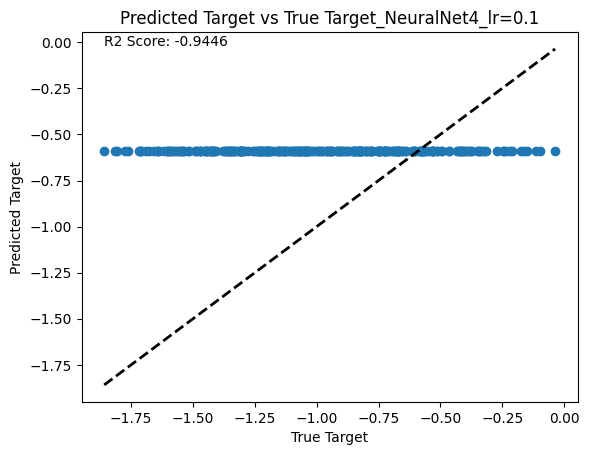

Text(0, 0.5, 'Loss')

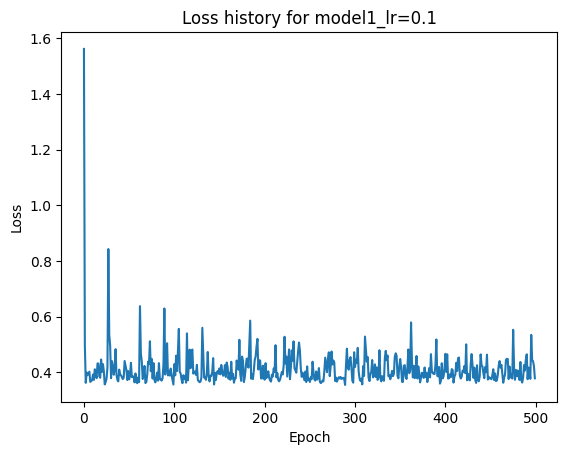

In [23]:
# Instantiate the model
model4 = NeuralNet4(input_size)
model4, model4_loss, model4_r2, loss_history4, last_loss4 = train_model(model4, train_loader, test_loader, num_epochs=500, lr=0.1)

# Append a new row to model_performance dataframe
new_row = {'Model': model4.name, 'Loss': model4_loss, 'R2 Score': model4_r2, 'learning_rate': 0.1, 'loss(MAE)': last_loss4}
model_performance = pd.concat([model_performance, pd.DataFrame([new_row])])

# plot the loss history
plt.plot(loss_history4)
plt.title('Loss history for model1_lr=0.1')
plt.xlabel('Epoch')
plt.ylabel('Loss')

## 5. Performance Viewing

In [24]:
model_performance

,Model,Loss,R2 Score,learning_rate,loss(MAE),loss(MSE)
0,NeuralNet1,0.014451,0.938799,0.001,NaN,0.014451
0,NeuralNet1,0.026784,0.924924,0.010,NaN,0.026784
0,NeuralNet1,0.369105,-0.000009,0.100,NaN,0.369105
0,NeuralNet2,0.013295,0.943308,0.001,NaN,0.013295
0,NeuralNet2,0.019981,0.938132,0.010,NaN,0.019981
0,NeuralNet2,0.356884,-0.041042,0.100,NaN,0.356884
0,NeuralNet3,0.007618,0.931238,0.001,NaN,0.007618
0,NeuralNet3,0.009411,0.939729,0.010,NaN,0.009411
0,NeuralNet3,0.275502,0.172304,0.100,NaN,0.275502
0,NeuralNet4,0.010307,0.939873,0.001,NaN,0.010307


In [25]:
# export model_performance to csv
model_performance.to_csv('MAE_result.csv', index=False)